<a href="https://colab.research.google.com/github/gsc16/MachineLearning/blob/master/hw1q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [1]:
import keras
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input,Dense
import math
import matplotlib.pyplot as plt
import cv2
import scipy
from scipy import ndimage
from skimage import util 

Using TensorFlow backend.


Loading images from MNIST dataset

In [0]:
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

Displaying the original values

In [3]:
train_images_original.shape, train_labels_original, test_images_original.shape, test_labels_original.shape

((60000, 28, 28),
 array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 (10000, 28, 28),
 (10000,))

Extracting images - Flattening and reshaping

In [0]:
train_images_new = (train_images_original.reshape(60000,28 * 28))
train_images_new = train_images_new.astype('float32')/255


test_images_new = (test_images_original.reshape(10000,28 * 28))
test_images_new = test_images_new.astype('float32')/255

Converting integer vectors to binary

In [0]:
train_labels_new = (keras.utils.to_categorical(train_labels_original,10))
test_labels_new = (keras.utils.to_categorical(test_labels_original,10))

Displaying new values

In [6]:
train_images_new.shape, train_labels_new.shape, test_images_new.shape, test_labels_new.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

Before conversion:


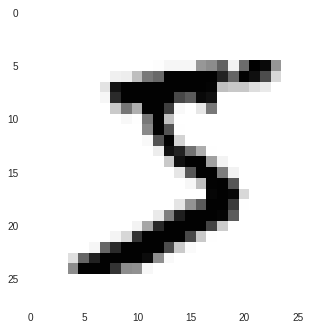

In [7]:
print("Before conversion:")
plt.grid(None)
plt.imshow(train_images_original[0])

Converting the images to black and white using cv2 library

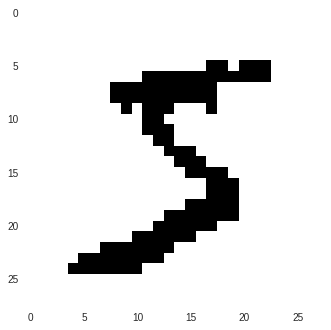

In [8]:
# Converting images to black and white
threshold = 127
for i in range(len(train_images_original)):
    train_images_original[i] = cv2.threshold(train_images_original[i], threshold, 255, cv2.THRESH_BINARY)[1]
    
for i in range(len(test_images_original)):
    test_images_original[i] = cv2.threshold(test_images_original[i], threshold, 255, cv2.THRESH_BINARY)[1]

plt.grid(None)
plt.imshow(train_images_original[0])

Calculating the number of connected components

In [0]:
train_images_original = train_images_original / 255;
test_images_original  = test_images_original  / 255; 

# initializing connected components

train_images_conn = np.zeros_like(train_labels_original)
test_images_conn  = np.zeros_like(test_labels_original)

In [0]:
for i in range(len(train_images_conn)):
  label,white_regions = ndimage.label(util.invert(train_images_original[i]))
  train_images_conn[i] = white_regions
  

for i in range(len(test_images_conn)):
  label,white_regions = ndimage.label(util.invert(test_images_original[i]))
  test_images_conn[i] = white_regions
  
# Normalize the number of white regions feature
train_images_conn = train_images_conn/3
test_images_conn = test_images_conn/3


Creating network

In [11]:
# Input layer for the images
input_shape =Input((28*28,))

# New layer to append the feature of white regions
conn_feature =Input((1,))

image_vector = Dense(64, activation='sigmoid')(input_shape)

# concatenating new features and output of first dense layer
network  = keras.layers.add([image_vector, conn_feature])   
network  = Dense(10, activation='softmax')(network)

network  = Model([input_shape, conn_feature],network)

Instructions for updating:
Colocations handled automatically by placer.


Compilation

In [0]:
network.compile(optimizer=keras.optimizers.SGD(lr = 0.01),loss='categorical_crossentropy', metrics=['accuracy'])

Training

In [13]:
model = network.fit([train_images_new,train_images_conn], 
                      train_labels_new, 
                      epochs= 10, 
                      batch_size= 10, 
                      validation_data=([test_images_new,test_images_conn], test_labels_new))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.9061 - acc: 0.7939 - val_loss: 0.4499 - val_acc: 0.8993
Epoch 2/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.3917 - acc: 0.9018 - val_loss: 0.3276 - val_acc: 0.9148
Epoch 3/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.3172 - acc: 0.9153 - val_loss: 0.2824 - val_acc: 0.9251
Epoch 4/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.2826 - acc: 0.9225 - val_loss: 0.2592 - val_acc: 0.9297
Epoch 5/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.2603 - acc: 0.9276 - val_loss: 0.2418 - val_acc: 0.9363
Epoch 6/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.2443 - acc: 0.9320 - val_loss: 0.2275 - val_acc: 0.9382
Epoch 7/10
60000/60000 [==============================] - 8s 139us/step - 

Display Loss

Test loss: 0.196713402184844
Test accuracy: 0.9462


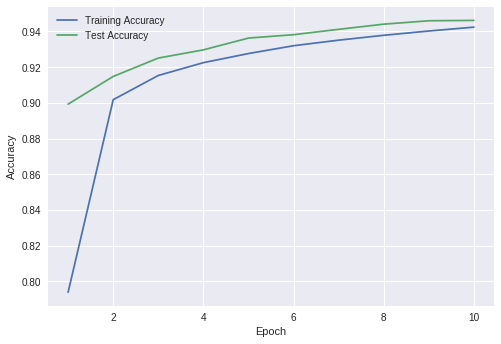

In [14]:
metrics = network.evaluate([test_images_new,test_images_conn], test_labels_new, verbose=0)
print('Test loss:', metrics[0])
print('Test accuracy:', metrics[1])

accuracyplot = plt.plot(range(1,11),model.history['acc'],range(1,11),model.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(('Training Accuracy','Test Accuracy'))
plt.show(accuracyplot)